## 决策边界

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

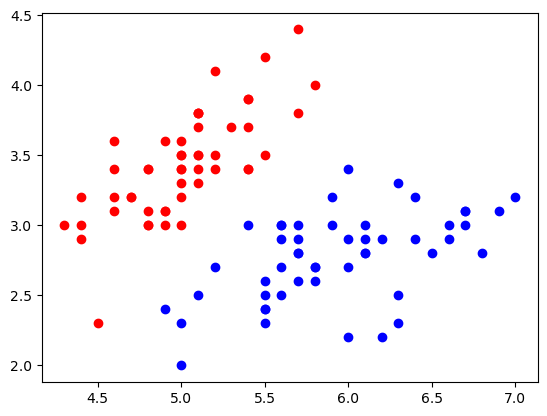

In [2]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666);

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [5]:
log_reg.coef_

array([[ 2.78090985, -2.71686283]])

In [6]:
log_reg.intercept_

array([-6.54621544])

In [7]:
def x2(x1):
    return (-log_reg.coef_[0][0] * x1 - log_reg.intercept_) / log_reg.coef_[0][1]

In [8]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

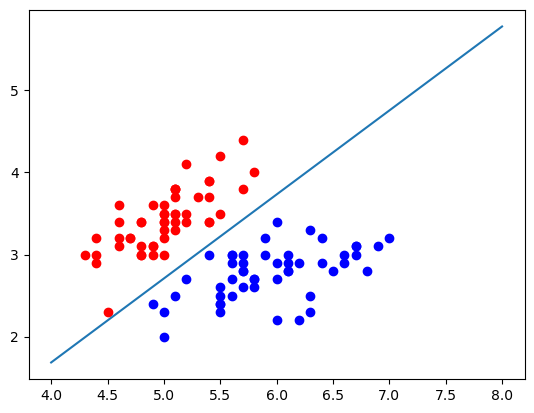

In [9]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

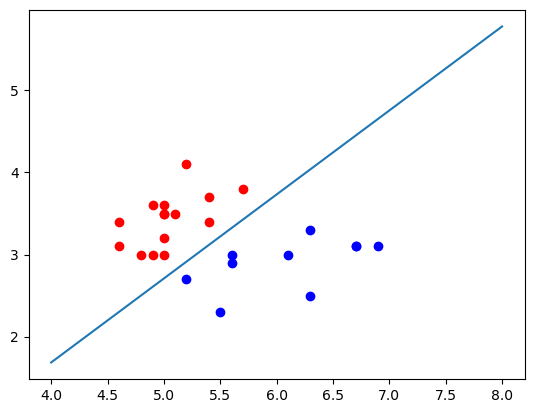

In [10]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

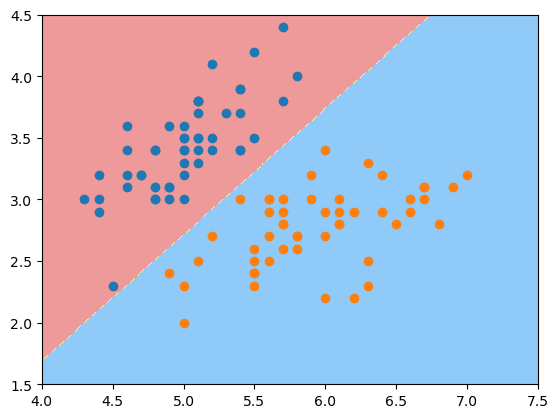

In [11]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz,cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### kNN的决策边界

对于kNN算法来说，k越小，决策边界越不规则，越过拟合。

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

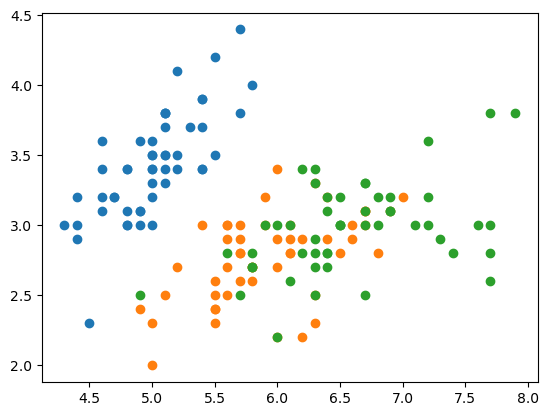

In [13]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [14]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz,cmap=custom_cmap)

### k = 1

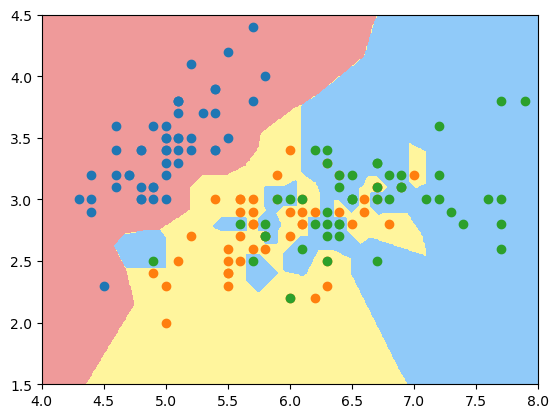

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_1 = KNeighborsClassifier(n_neighbors=1)
knn_clf_1.fit(X, y)

plot_decision_boundary(knn_clf_1, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### k = 5

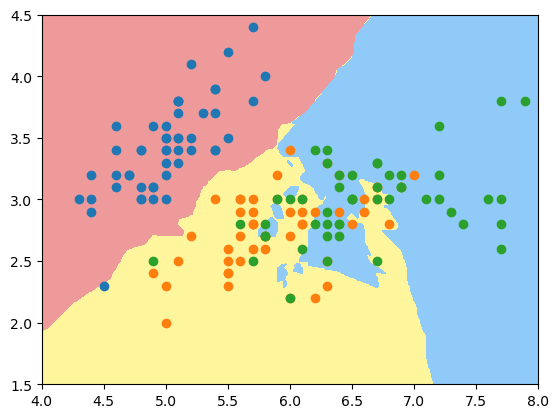

In [16]:
knn_clf_5 = KNeighborsClassifier(n_neighbors=5)
knn_clf_5.fit(X, y)

plot_decision_boundary(knn_clf_5, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### k = 25

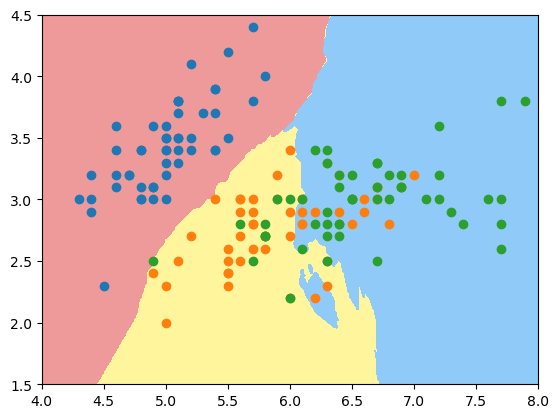

In [17]:
knn_clf_25 = KNeighborsClassifier(n_neighbors=25)
knn_clf_25.fit(X, y)

plot_decision_boundary(knn_clf_25, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### k = 100

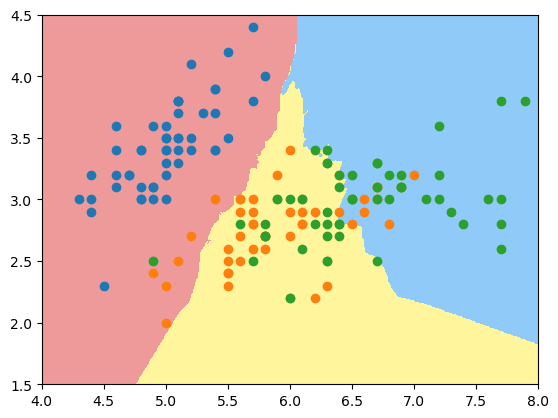

In [18]:
knn_clf_100 = KNeighborsClassifier(n_neighbors=100)
knn_clf_100.fit(X, y)

plot_decision_boundary(knn_clf_100, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()